<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-6-air-quality-analysis?scriptVersionId=255382629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Air Quality Analysis in Indian Cities

-> To begin the analysis, we import the essential Python libraries:

pandas for data manipulation and analysis.

numpy for numerical operations.

matplotlib.pyplot for visualizing the data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [2]:
import matplotlib.pyplot as plt

Importing city_day.csv file from air-quality-data-india data set usnig read_csv method in pandas

In [3]:
df=pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")
df=pd.DataFrame(df)#Creating DataFrame df


In [4]:
df.shape

(29531, 16)

## Data Cleaning

The info() method in Pandas provides a concise summary of a DataFrame.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


From info method we got all columns, not null count and Dtype. 

Date Dtype is Object here, lets convert its datatype to date which can be useful for our analysis.

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
print(df['Date'].dtype)   

datetime64[ns]


Date Datatype is changed successfully

Checking how many null values are there in table

In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

ALL COLUMNS HAVE NULL VALUES EXCEPT CITY AND DATE

In [8]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

#Fill missing values with city-wise median
for col in numeric_cols:
    df[col] = df.groupby('City')[col].transform(lambda x: x.fillna(x.median()))

# Fill any remaining nulls using overall column median 
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [9]:
print(df.isnull().sum())

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


FILLING AQI_BUCKET USING AQI VALUES AND RANGES GIVEN BY GOVT

In [10]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [11]:
# Define function to assign AQI_Bucket based on AQI
def assign_aqi_bucket(aqi):
    if pd.isnull(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Fill only where AQI_Bucket is null
df.loc[df['AQI_Bucket'].isnull(), 'AQI_Bucket'] = df.loc[df['AQI_Bucket'].isnull(), 'AQI'].apply(assign_aqi_bucket)


In [12]:
print(df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


After handling missing values, the dataset now has **zero null values** in all columns

**The value_counts()** method in Pandas is used to count the occurrences of unique values within a Series or a DataFrame column.

The dataset contains air quality ratings classified into **six categories**

In [13]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        10338
Satisfactory     9979
Poor             3416
Very Poor        3012
Good             1448
Severe           1338
Name: count, dtype: int64

Most cities had **Moderate** and **Satisfactory** air quality. Few records show **Severe** pollution levels.

In [14]:
df[df['City'] == 'Ahmedabad']['AQI_Bucket'].value_counts()

AQI_Bucket
Very Poor       891
Severe          638
Poor            238
Moderate        198
Satisfactory     43
Good              1
Name: count, dtype: int64

head function shows first 40 rows

In [15]:
df.head(40)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,58.37,107.96,0.92,18.22,17.15,14.5,0.920,27.64,133.36,0.00,0.02,0.00,384.5,Very Poor
1,Ahmedabad,2015-01-02,58.37,107.96,0.97,15.69,16.46,14.5,0.970,24.55,34.06,3.68,5.50,3.77,384.5,Very Poor
2,Ahmedabad,2015-01-03,58.37,107.96,17.40,19.30,29.70,14.5,17.400,29.07,30.70,6.80,16.40,2.25,384.5,Very Poor
3,Ahmedabad,2015-01-04,58.37,107.96,1.70,18.48,17.97,14.5,1.700,18.59,36.08,4.43,10.14,1.00,384.5,Very Poor
4,Ahmedabad,2015-01-05,58.37,107.96,22.10,21.42,37.76,14.5,22.100,39.33,39.31,7.01,18.89,2.78,384.5,Very Poor
5,Ahmedabad,2015-01-06,58.37,107.96,45.41,38.48,81.50,14.5,45.410,45.76,46.51,5.42,10.83,1.93,384.5,Very Poor
6,Ahmedabad,2015-01-07,58.37,107.96,112.16,40.62,130.77,14.5,112.160,32.28,33.47,0.00,0.00,0.00,384.5,Very Poor
7,Ahmedabad,2015-01-08,58.37,107.96,80.87,36.74,96.75,14.5,80.870,38.54,31.89,0.00,0.00,0.00,384.5,Very Poor
8,Ahmedabad,2015-01-09,58.37,107.96,29.16,31.00,48.00,14.5,29.160,58.68,25.75,0.00,0.00,0.00,384.5,Very Poor
9,Ahmedabad,2015-01-10,58.37,107.96,16.28,7.04,0.00,14.5,16.245,8.29,4.55,0.00,0.00,0.00,384.5,Very Poor


In [16]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,64.495018,111.529814,17.586426,28.038496,31.738348,21.785599,2.469716,15.120249,33.794051,2.879523,7.250242,1.968859,165.369578
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-04-16 00:00:00,28.080000,63.775000,6.100000,12.080000,14.495000,10.770000,0.510000,6.050000,19.960000,0.180000,0.680000,0.780000,86.000000
50%,2018-08-05 00:00:00,48.170000,100.685000,10.580000,21.460000,24.290000,14.500000,0.900000,9.900000,29.620000,1.020000,2.650000,1.130000,117.000000
75%,2019-09-03 00:00:00,76.345000,125.615000,22.220000,36.650000,39.510000,27.070000,1.500000,15.600000,43.025000,2.750000,6.720000,1.600000,208.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,60.418818,75.030435,21.513692,23.404976,29.538093,21.530224,7.014473,17.676906,20.445550,14.257731,17.424784,4.077188,135.315410


The dataset shows a wide range of air pollutant levels.  
For example:
- **PM2.5** ranges from 0.04 to 949.99
- **AQI** ranges from 13 to 2049
- The mean AQI is around **165**, indicating average air quality is in the **Moderate to Poor** range.

# EXPLORATORY ANALYSIS 


**DISTRIBUTION OF VARIOUS POLLUTANTS USING HISTOGRAMS**


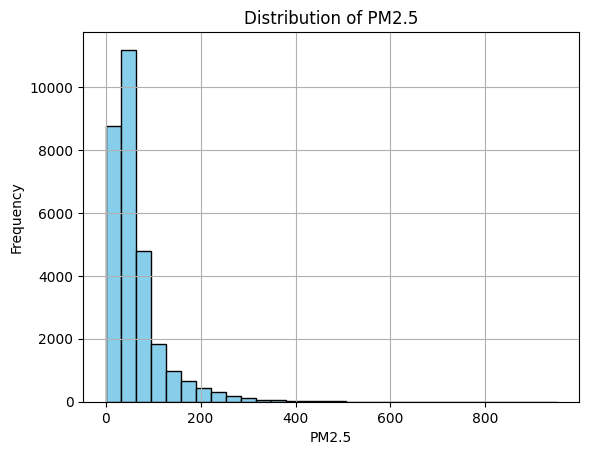

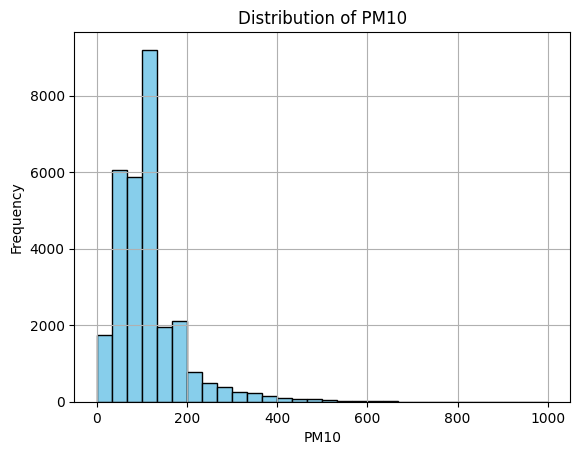

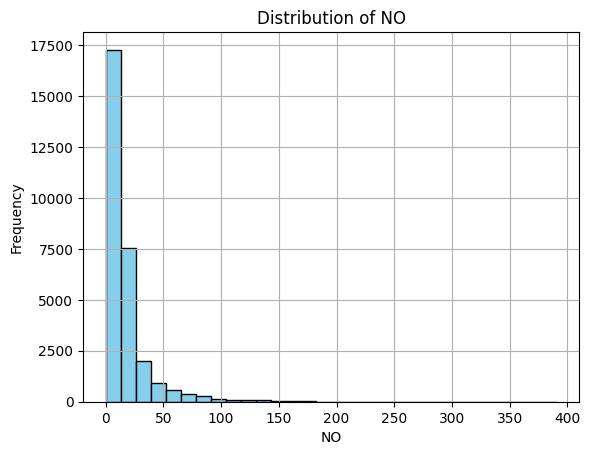

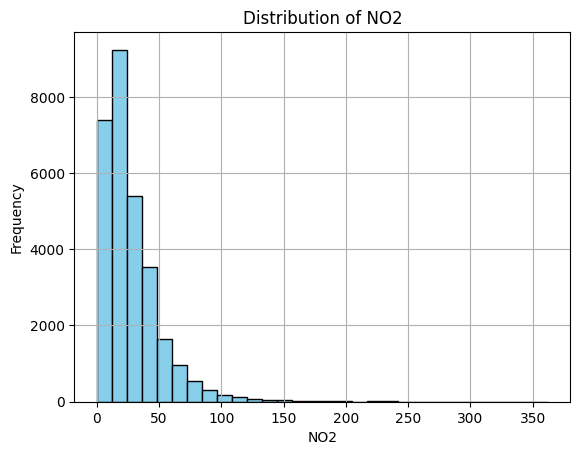

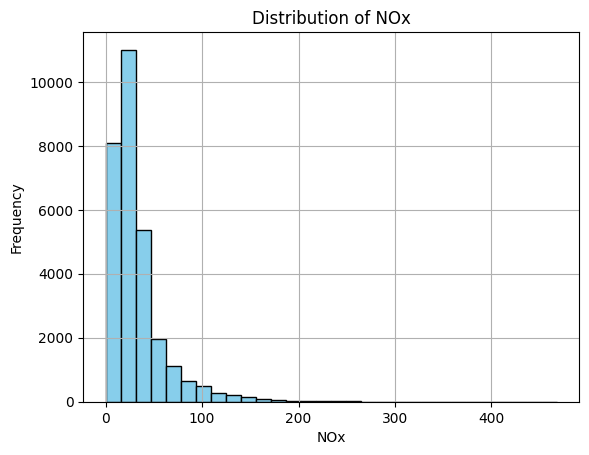

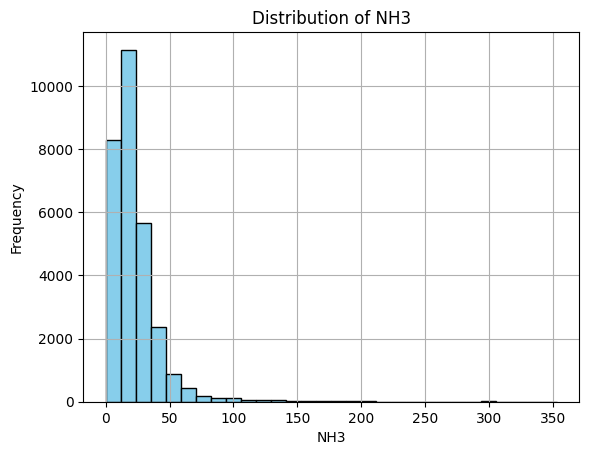

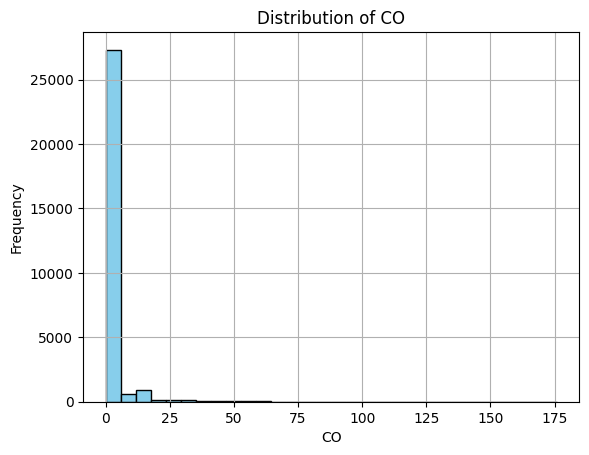

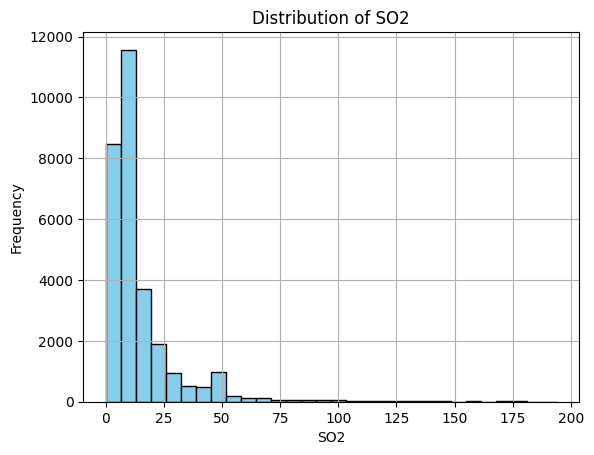

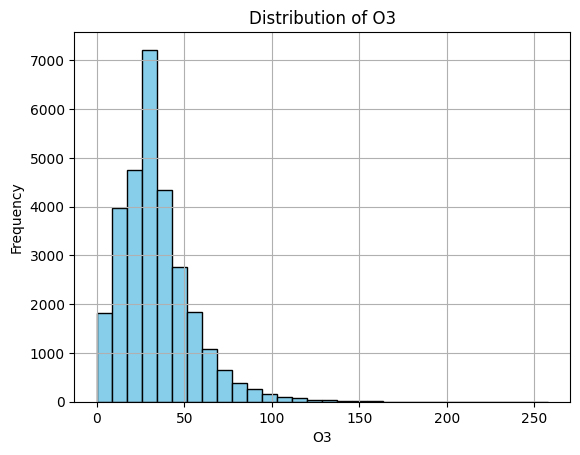

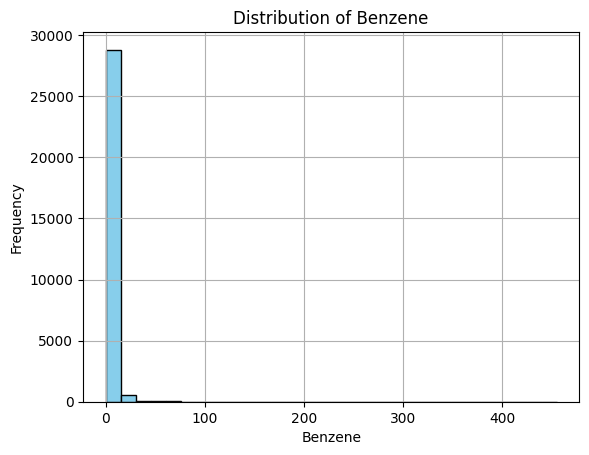

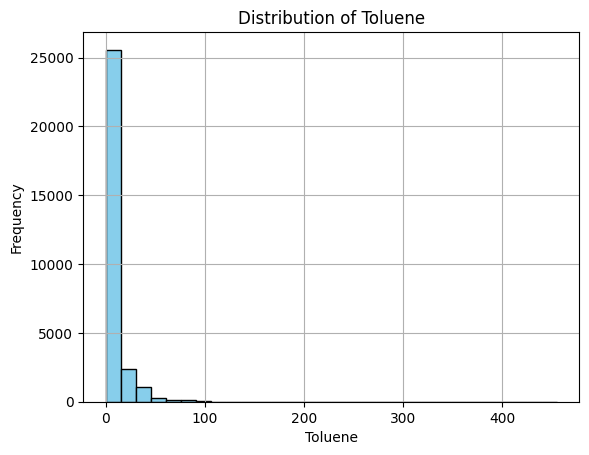

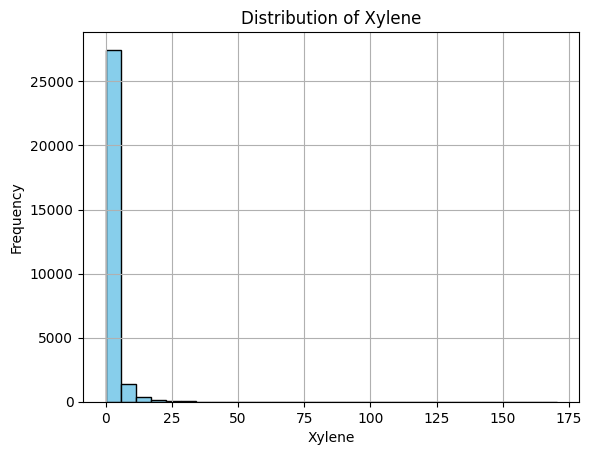

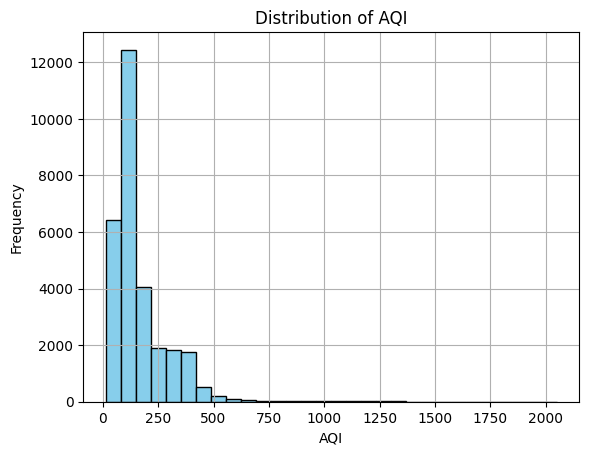

In [17]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Notes from Histograms of Pollutants

Plotted histograms for key air pollutants like PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, and O3 Benzene Toulene Xylene and AQI .  
Most distributions are **right-skewed**, showing high frequency of lower pollutant levels and few extreme values.


**This scatter plot visualizes the relationship between PM2.5 and PM10 concentration levels in the dataset.**

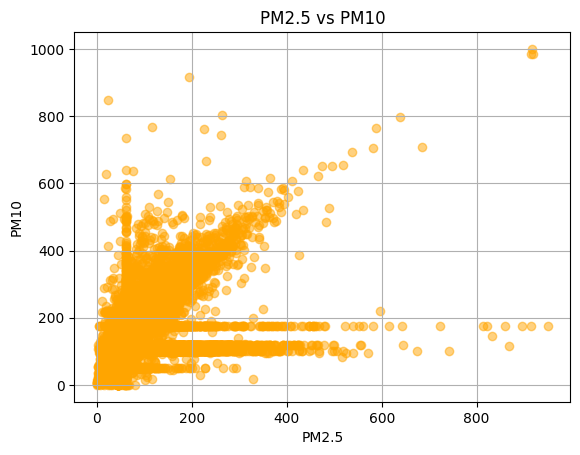

In [18]:
# PM2.5 vs PM10
plt.scatter(df['PM2.5'], df['PM10'], alpha=0.5, color='orange')
plt.title('PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.grid(True)
plt.show()


**Notes:** From the visualization, it appears that PM10 tends to increase with PM2.5, though with some dispersion, indicating a positive but possibly nonlinear relationship.

**Average Pollutant Levels by City**

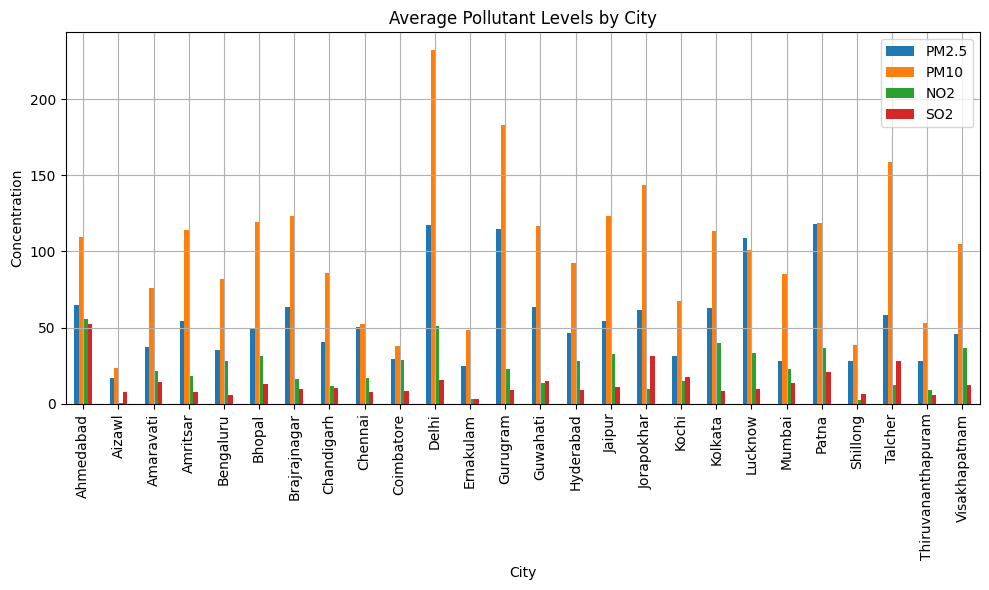

In [19]:
mean_pollutants = df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2']].mean()

mean_pollutants.plot(kind='bar', figsize=(10,6))
plt.title('Average Pollutant Levels by City')
plt.ylabel('Concentration')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


Cities like Delhi, Gurugram,Jorapokhar and Talcher show the highest concentrations of PM10, followed by PM2.5.
PM10 remains the most dominant pollutant across most cities in the dataset.
NO2 and SO2 levels are comparatively lower but still contribute to overall pollution levels.

**cities with top 10 Average AQI**

In [20]:
city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
print(city_avg_aqi.head(10))

City
Ahmedabad       429.402439
Delhi           259.475361
Patna           235.245425
Gurugram        222.818940
Lucknow         216.819811
Talcher         161.994054
Jorapokhar      150.313944
Brajrajnagar    143.496802
Guwahati        139.523904
Kolkata         137.133907
Name: AQI, dtype: float64


Clearly there is some outlier in Ahmedabad as in previous graphs, ahmedabad doesnt have more pollutant levels or AQI is not solely dependent on the absolute concentrations of individual pollutants.

**AQI Record Counts by City**

In [21]:
severe_days = df[df['AQI_Bucket'] == 'Severe']
top_severe_cities = severe_days['City'].value_counts().head(10)
print(top_severe_cities)

City
Ahmedabad     638
Delhi         239
Patna         174
Lucknow       110
Gurugram       95
Talcher        24
Jorapokhar     18
Kolkata        13
Amritsar        7
Hyderabad       7
Name: count, dtype: int64


Ahmedabad has a significantly higher number of AQI records (638), far more than any other city in the dataset.
Cities like Delhi, Patna, and Lucknow also have notable observation counts.

**AQI Category Distribution**

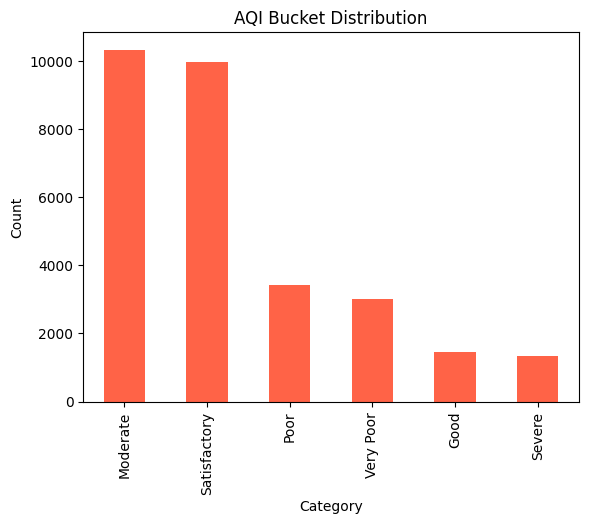

In [22]:
df['AQI_Bucket'].value_counts().plot(kind='bar', color='tomato')
plt.title('AQI Bucket Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Notes**:Most AQI observations fall under the Moderate and Satisfactory categories, indicating average air quality in many areas.
However, there are still a significant number of days marked as Poor, Very Poor, and even Severe, which are concerning.
Good air quality days are the least frequent, highlighting the need for better pollution control efforts.

**Average PM2.5 and PM10 Levels by AQI Category**

In [23]:
avg_pm = df.groupby('AQI_Bucket')[['PM2.5', 'PM10']].mean()
print(avg_pm)

                   PM2.5        PM10
AQI_Bucket                          
Good           18.937883   40.163198
Moderate       56.390213  115.363239
Poor           96.396314  163.140669
Satisfactory   30.412057   68.673414
Severe        186.488490  196.746872
Very Poor     136.761282  178.279424


As expected, PM2.5 and PM10 concentrations increase consistently from Good to Severe AQI categories.
Severe air quality days have the highest average PM2.5  and PM10 values, far exceeding safe limits.
This strong correlation confirms that particulate matter is a major driver of poor air quality.

**AQI Category Trends from 2015 to 2020**

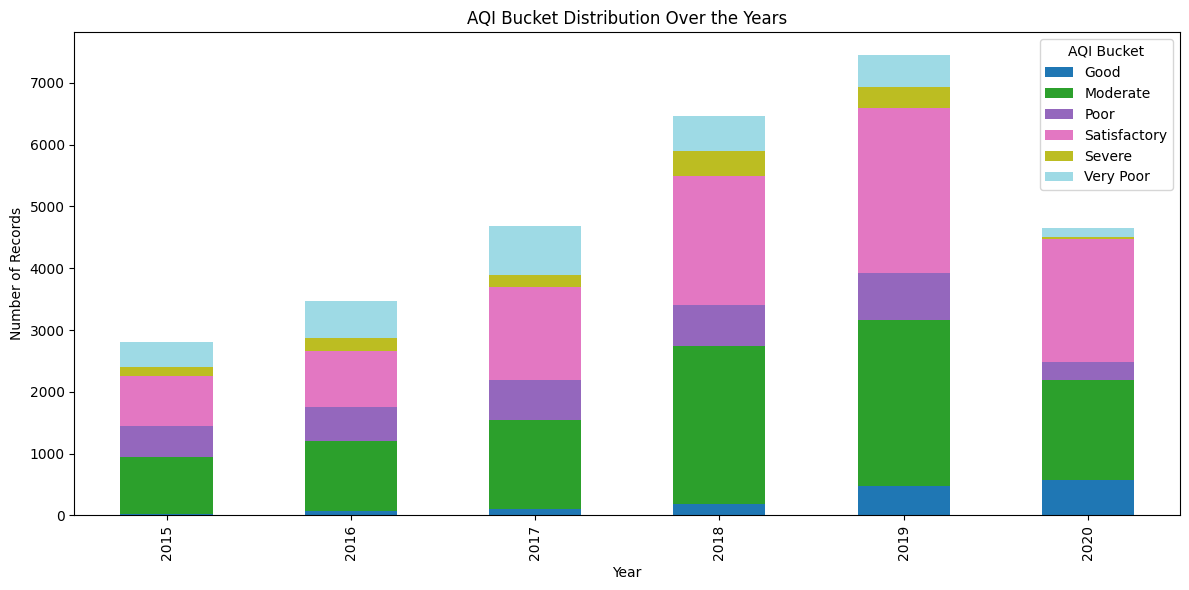

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create a 'Year' column
df['Year'] = df['Date'].dt.year

# Group data: count of each AQI Bucket per year
bucket_counts = df.groupby(['Year', 'AQI_Bucket']).size().unstack().fillna(0)

# Plotting
bucket_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('AQI Bucket Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(title='AQI Bucket')
plt.tight_layout()
plt.show()

The number of air quality records increased steadily from 2015 to 2019, peaking in 2019 before dropping in 2020.
Moderate and Satisfactory categories dominate most years, but Poor, Very Poor, and Severe also rise notably after 2017.
In 2020, there's a visible improvement, possibly due to reduced activity during COVID-19 lockdowns.

**Highest Recorded AQI Values by City**

In [25]:

# Get the row with highest AQI per city
worst_pollution_by_city = df.loc[df.groupby('City')['AQI'].idxmax()][['City', 'Date', 'AQI']]

# Sort to see cities with highest overall AQI on top (optional)
worst_pollution_by_city = worst_pollution_by_city.sort_values(by='AQI', ascending=False)

# View the result
print(worst_pollution_by_city.head(10))


             City       Date     AQI
1145    Ahmedabad 2018-02-19  2049.0
14257    Guwahati 2019-08-13   956.0
13042    Gurugram 2017-08-30   891.0
3546     Amritsar 2018-06-15   869.0
15110   Hyderabad 2016-06-16   737.0
10905       Delhi 2016-11-07   716.0
19926     Lucknow 2015-03-22   707.0
24078       Patna 2016-01-01   619.0
18326  Jorapokhar 2019-01-05   604.0
26453     Talcher 2019-02-14   570.0


Ahmedabad shows an unusually high AQI value of 2049 on a single day, which is far beyond standard pollution levels and likely an outlier.
Such an extreme spike raises suspicion about data quality or measurement error for that record.
Other cities like Guwahati, Gurugram, and Amritsar also experienced very high AQI events, though within a more believable range. 

Thats why I interpret there are some errors in Ahmedabad AQI Values 

**Maximum Pollutant Concentrations Recorded by City**

In [26]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create an empty list to store results
results = []

# Loop through each pollutant
for col in pollutants:
    if col in df.columns:
        max_idx = df[col].idxmax()
        row = df.loc[max_idx, ['City', 'Date', col]]
        results.append({
            'Pollutant': col,
            'City': row['City'],
            'Date': row['Date'],
            'Max Value': row[col]
        })

# Create a summary DataFrame
summary_df = pd.DataFrame(results)

# Display result
print(summary_df)

   Pollutant          City       Date  Max Value
0      PM2.5      Gurugram 2017-08-29     949.99
1       PM10      Guwahati 2019-05-04    1000.00
2         NO  Brajrajnagar 2020-05-14     390.68
3        NO2      Gurugram 2017-02-03     362.21
4        NOx        Mumbai 2016-07-28     467.63
5        NH3       Chennai 2015-12-22     352.89
6         CO     Ahmedabad 2017-10-25     175.81
7        SO2        Mumbai 2017-12-08     193.86
8         O3         Delhi 2016-10-30     257.73
9    Benzene      Shillong 2020-03-10     455.03
10   Toluene      Shillong 2020-03-06     454.85
11    Xylene         Patna 2019-10-17     170.37


Some pollutants have reached extremely high levels, such as PM10 at 1000 in Guwahati and PM2.5 at 950 in Gurugram, indicating hazardous air conditions.
Mumbai, Delhi, and Shillong also report alarming spikes in gases like NOx, SO2, O₃, Benzene, and Toluene, far above safe exposure limits.
These peak values highlight acute pollution events and may reflect industrial activity, weather anomalies, or localized emission surges.

# Summary 

The dataset contains 29,531 AQI records across multiple Indian cities, mostly falling under the Moderate and Satisfactory categories.

PM10 and PM2.5 are the dominant pollutants, with levels increasing consistently from Good to Severe AQI buckets.

Cities like Delhi, Gurugram, Jorapokhar, and Talcher show the highest concentrations of particulate matter.

Ahmedabad stands out with the highest AQI value (2049), likely an outlier due to its extreme deviation from other observations.

Although Ahmedabad doesn't have the highest pollutant levels, it has the most AQI records (638), which may influence its AQI statistics.

Extreme pollution events were recorded in cities like Guwahati (PM10: 1000) and Gurugram (PM2.5: 950), indicating hazardous air conditions.

Several gases like NOx, SO₂, Benzene, and Toluene peaked alarmingly high in cities such as Mumbai, Shillong, and Delhi.

AQI data rose from 2015 to 2019, dropping in 2020 likely due to COVID-19-related lockdowns, suggesting reduced human activity impacts air quality.

**Covid 19 and lockdown decreased pollution**

Particulate matter (PM2.5 and PM10) is the primary driver of poor air quality. 